# WM811k EDA

In [1]:
# Import Libaries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
%matplotlib inline
# plt.style.use('ggplot')
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.ticker import StrMethodFormatter
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
path2 = '/Users/ezinn/Desktop/LSWMD.pkl'
df = pd.read_pickle(path2)

### Simple EDA for WM811k

In [251]:
tol_wafers = df.shape[0]
tol_wafers

811457

In [4]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [154]:
# df=pd.read_pickle("LSWMD.pkl")
# df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df = df.rename(columns={'trianTestLabel': 'TrainTestLabel'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   TrainTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [6]:
# convert Series to Python strings
df.TrainTestLabel = df.TrainTestLabel.astype(str)

In [35]:
l_types = df.failureType.value_counts().index.tolist()

In [195]:
f'{(1-df1.shape[0]/df.shape[0])*100:.1f} %'

'78.7 %'

In [238]:
df1.shape[0]

172950

In [237]:
df1.shape[0]-df1.failureType.value_counts()[0]

25519

In [27]:
n_labeled = df.shape[0]-638507
n_failures = n_labeled - 147431
print(f'{n_failures/n_labeled*100:.03}% failures\n  Failures:\t\t{n_failures:,}\n  Total:\t\t{n_labeled:,}')

14.8% failures
  Failures:		25,519
  Total:		172,950


### Generate numeric labels for the data

In [443]:
d_lables = dict(zip(l_types, range(10)))

In [444]:
d_lables

{'[]': 0,
 "[['none']]": 1,
 "[['Edge-Ring']]": 2,
 "[['Edge-Loc']]": 3,
 "[['Center']]": 4,
 "[['Loc']]": 5,
 "[['Scratch']]": 6,
 "[['Random']]": 7,
 "[['Donut']]": 8,
 "[['Near-full']]": 9}

In [446]:
df['encoding'] = df.failureType.map(d_lables)

## Create new DF w/ only labeled data

In [447]:
df1 = df[df['encoding'] != 0].copy()

In [448]:
df1.failureType.value_counts()

[['none']]         147431
[['Edge-Ring']]      9680
[['Edge-Loc']]       5189
[['Center']]         4294
[['Loc']]            3593
[['Scratch']]        1193
[['Random']]          866
[['Donut']]           555
[['Near-full']]       149
Name: failureType, dtype: int64

### Clean up data and dimensions of Wafermap as columns

In [449]:
df1['x_'] = df1.waferMap.apply(lambda x: x.shape[0])
df1['y_'] = df1.waferMap.apply(lambda x: x.shape[1])

In [450]:
df1['shape'] = df1.waferMap.apply(lambda x: x.shape)

In [451]:
df1.failureType = df1.failureType.str.replace("'",'').str.replace("[",'').str.replace("]",'')

In [452]:
labels = df1.failureType.value_counts().index.tolist()

In [456]:
z = [np.eye(9)[i] for i in range(9)]

map_ohe = dict(zip(range(9),z))

df1['labels'] = df1.failureType.apply(lambda x: labels.index(x)).map(map_ohe)

[array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1.])]

### Setup train/dev/test split

In [458]:
df1 = df1.drop(columns='TrainTestLabel')

In [459]:
from sklearn.model_selection import train_test_split

X = df1[df1.columns[[0,1,2,3,-4,-3,-2]]]
y = df1[df1.columns[[-6]]]

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.3)

X_dev, X_test, y_dev, y_test = train_test_split(X_val, y_val,
                                                    stratify=y_val, 
                                                    test_size=0.5)

df1['dataset'] = ''
df1.at[X_train.index, 'dataset'] = 'train'
df1.at[X_dev.index, 'dataset'] = 'dev'
df1.at[X_test.index, 'dataset'] = 'test'

In [461]:
df1.reset_index(drop=True)

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
...,...,...,...,...,...,...,...,...,...,...,...
172945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Edge-Loc,3,26,30,"(26, 30)","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
172946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Edge-Loc,3,26,30,"(26, 30)","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
172947,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Edge-Ring,2,26,30,"(26, 30)","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
172948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Edge-Loc,3,26,30,"(26, 30)","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",dev


In [115]:
df1.columns[[0,1,2,3,-4,-3,-2]]

Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'x_', 'y_', 'shape'], dtype='object')

In [119]:
df1.columns[[-6,-5,-1]]

Index(['failureType', 'encoding', 'labels'], dtype='object')

In [143]:
df1[df1.dataset == 'test'].failureType.value_counts(normalize=True)

none         0.852446
Edge-Ring    0.055275
Edge-Loc     0.030297
Center       0.025826
Loc          0.019620
Scratch      0.006784
Random       0.005705
Donut        0.002929
Near-full    0.001118
Name: failureType, dtype: float64

In [144]:
df1[df1.dataset == 'train'].failureType.value_counts(normalize=True)

none         0.852451
Edge-Ring    0.055962
Edge-Loc     0.030066
Center       0.024673
Loc          0.020857
Scratch      0.006798
Random       0.004964
Donut        0.003378
Near-full    0.000851
Name: failureType, dtype: float64

In [145]:
df1[df1.dataset == 'dev'].failureType.value_counts(normalize=True)

none         0.852440
Edge-Ring    0.056703
Edge-Loc     0.029412
Center       0.024555
Loc          0.021548
Scratch      0.007478
Random       0.004510
Donut        0.002698
Near-full    0.000655
Name: failureType, dtype: float64

In [590]:
df1.reset_index(drop=True).to_pickle('WM-clean.pkl')

In [454]:
df1.encoding.value_counts()

1    147431
2      9680
3      5189
4      4294
5      3593
6      1193
7       866
8       555
9       149
Name: encoding, dtype: int64

### EDA figures

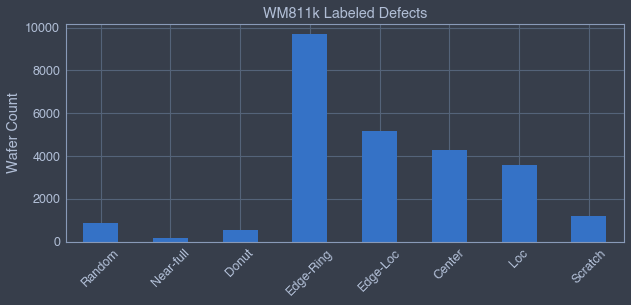

In [245]:
ax = df1[df1.failureType != 'none'].failureType.value_counts(sort=False). \
    plot(kind='bar', 
         ylabel='Wafer Count', 
         figsize = (10,4), 
         title='WM811k Labeled Defects',
        )
ax.tick_params(axis='x',rotation = 45)

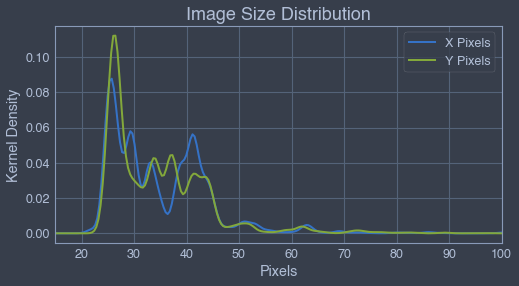

In [405]:
ax = df1[['x_','y_']]. \
    plot(kind = 'kde',
        xlim = (15,100),
        figsize = (8, 4),
        linewidth = 2,
        )
ax.set_xlabel('Pixels')
ax.set_ylabel('Kernel Density')
ax.set_title("Image Size Distribution", fontsize = 18)
ax.legend(['X Pixels', 'Y Pixels'],
#         loc = 'center left',
#         bbox_to_anchor = (1.0, 0.5)
        );

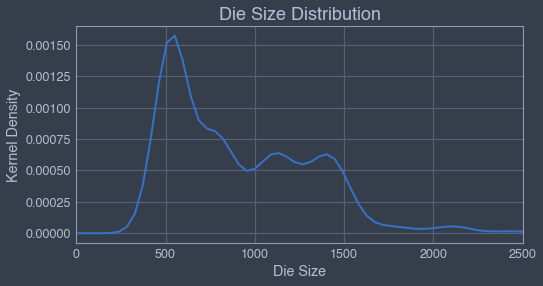

In [404]:
ax = df1.dieSize.plot(kind='kde',xlim=[0,2500],linewidth = 2, figsize=(8,4))
ax.set_ylabel('Kernel Density')
ax.set_title("Die Size Distribution", fontsize = 18)
ax.set_xlabel('Die Size');

#### Random EDA looking at image dimensions and distribution of the data

In [66]:
df1.x_.value_counts().head()

25    22955
41    17323
26    16037
29    14656
33    14352
Name: x_, dtype: int64

In [67]:
df1.y_.value_counts().head()

26    30301
27    21790
37    14402
34    13975
25    10689
Name: y_, dtype: int64

In [60]:
df1.waferMap.apply(lambda x: x.shape).value_counts().cumsum().head(30)

(25, 27)     18781
(26, 26)     33147
(30, 34)     45547
(29, 26)     57298
(27, 25)     67980
(39, 37)     78153
(33, 29)     86278
(42, 44)     93002
(44, 41)     99136
(41, 33)    104227
(35, 31)    108558
(25, 26)    112732
(41, 38)    116884
(33, 37)    120613
(29, 27)    123485
(45, 42)    126133
(43, 44)    128711
(41, 40)    131283
(41, 45)    133596
(38, 36)    135723
(38, 38)    137809
(33, 35)    139604
(51, 30)    141130
(53, 52)    142649
(26, 30)    144162
(41, 42)    145668
(41, 41)    147131
(63, 62)    148555
(34, 31)    149938
(43, 42)    151205
Name: waferMap, dtype: int64

In [76]:
df1.groupby('lotName').count().groupby('waferMap').count()

,dieSize,waferIndex,TrainTestLabel,failureType,encoding,x_,y_,shape
waferMap,,,,,,,,
1,2441,2441,2441,2441,2441,2441,2441,2441
2,519,519,519,519,519,519,519,519
3,234,234,234,234,234,234,234,234
4,150,150,150,150,150,150,150,150
5,111,111,111,111,111,111,111,111
6,105,105,105,105,105,105,105,105
7,70,70,70,70,70,70,70,70
8,60,60,60,60,60,60,60,60
9,47,47,47,47,47,47,47,47


In [394]:
df1.dieSize.describe()

count    172950.000000
mean       1042.232374
std        1032.572449
min           3.000000
25%         533.000000
50%         776.000000
75%        1250.000000
max       22372.000000
Name: dieSize, dtype: float64

# Visually inspect lots 

In [ ]:
import skimage
# Import Libaries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.ticker import StrMethodFormatter
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Data was generated with pandas 1.1.3 & uses pickle protocol 5 as default
df1 = pd.read_pickle('WM-clean.pkl')

In [586]:
cmxkcd = colors.XKCD_COLORS.copy()
full_lots_df1 = (df1.groupby('lotName').count().waferMap ==
                 25).index[df1.groupby('lotName').count().waferMap == 25].tolist()


def plot_lot(lot, fig_size=(10, 10), resize=False, img_dims=[30, 30]):
    lot_df = df1[df1['lotName'] == lot]
    lot_df.reset_index(drop=True, inplace=True)

    total_rows = len(lot_df.index)
    ax_cnt = 5

    fig, axs = plt.subplots(ax_cnt, ax_cnt, figsize=fig_size)
    # make a color map of fixed colors - blue passing die, fuchsia failing die
    cmap = colors.ListedColormap(
        [cmxkcd['xkcd:white'], cmxkcd['xkcd:azure'], cmxkcd['xkcd:fuchsia']])

    # Nested for loops to loop through all digits and number of examples input for ploting
    for n_row in range(total_rows):
        img = lot_df.waferMap[n_row]
        if resize:
            img = skimage.transform.resize(
                img*1024, img_dims, anti_aliasing=True)

        # imshow to plot image in axs i,j loaction in plot
        i = n_row % ax_cnt
        j = int(n_row/ax_cnt)
        axs[i, j].imshow(img,
                         interpolation='none',
                         cmap=cmap)
        axs[i, j].axis('off')

        if i == 0 and j == 2:
            axs[i, j].set_title(f'{lot}\n{lot_df.failureType[n_row][3:-3]}')
        else:
            axs[i, j].set_title(
                f'{lot_df.failureType[n_row][3:-3]}', fontsize=9)

    plt.show()


def plot_n(n=5, img_dims=[30, 30], fig_size=(10, 10)):
    lots_used = {}
    for _ in range(n):
        lot = full_lots_df1[np.random.randint(len(full_lots_df1))]
        lots_used[_] = lot
        print(f'[{_}] - {lot}')
        plot_lot(lot, resize=True, fig_size=fig_size)
    return lots_used

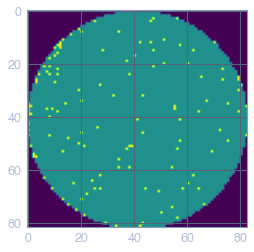

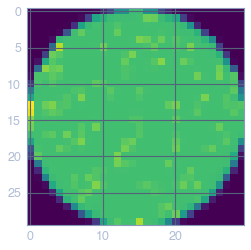

In [489]:
d12 = df[df['lotName'] == 'lot15471'].iloc[0].waferMap
d123 = skimage.transform.resize(d12*1024,[30,30], anti_aliasing=True)
plt.imshow(d12);
plt.show()
plt.imshow(d123);
plt.show()

[0] - lot40904


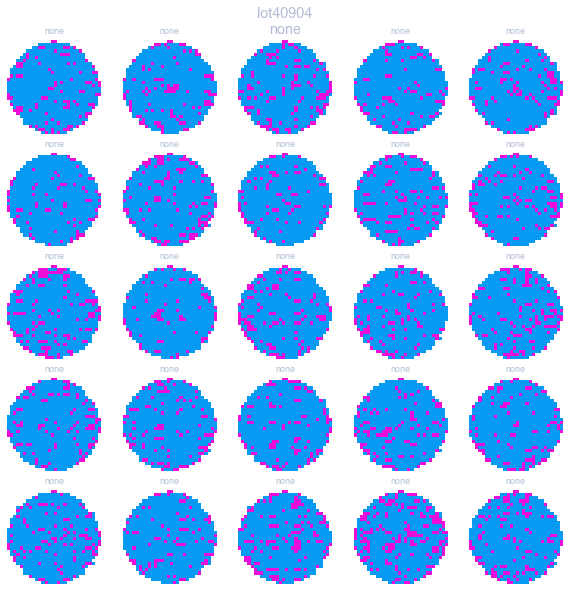

[1] - lot45141


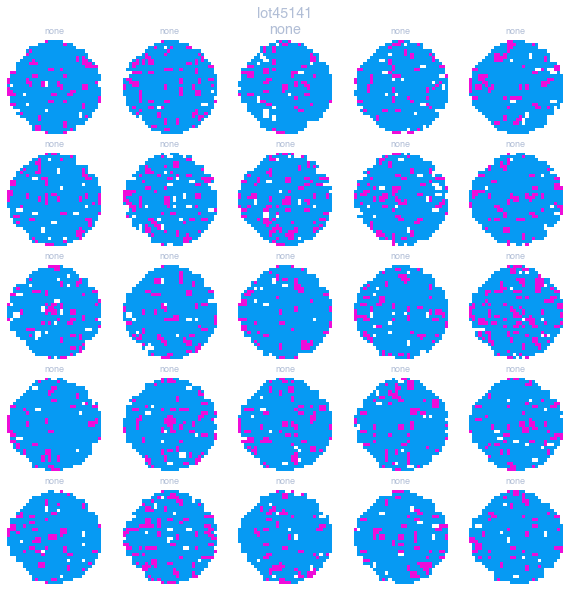

[2] - lot43932


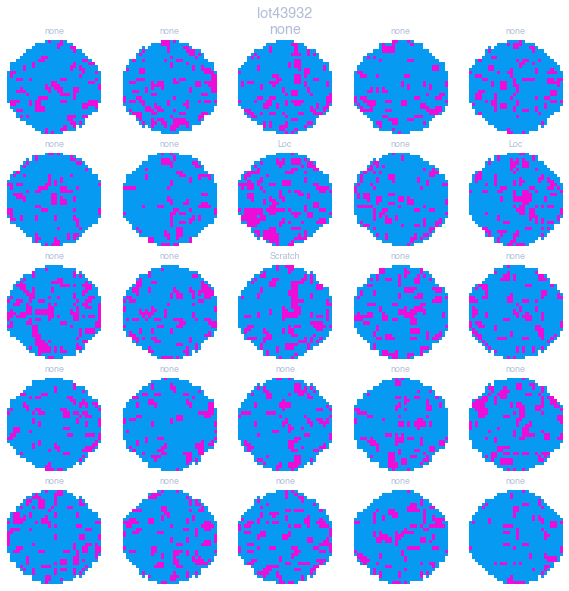

[3] - lot18377


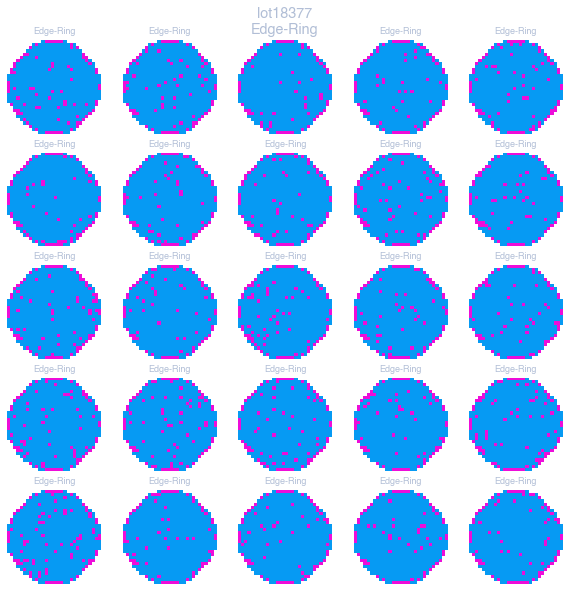

[4] - lot43246


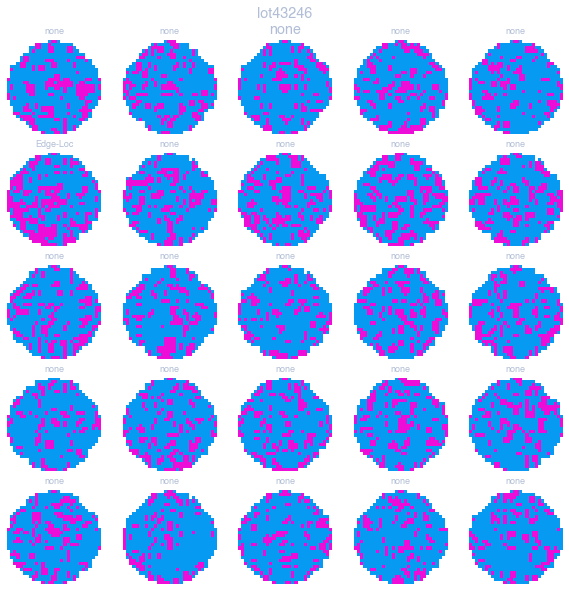

In [585]:
lots_used = plot_n()

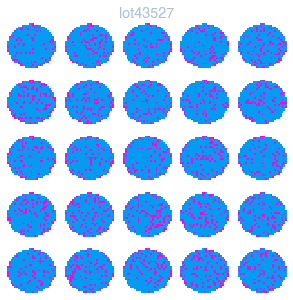

In [536]:
plot_lot(lots_used[0])

lot40904


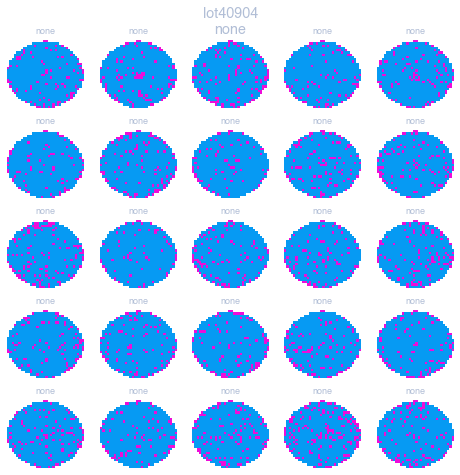

lot45141


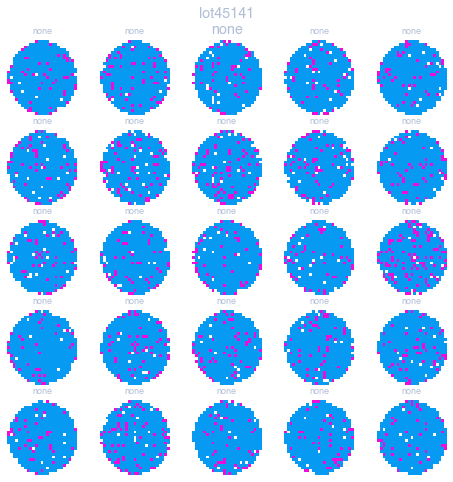

lot43932


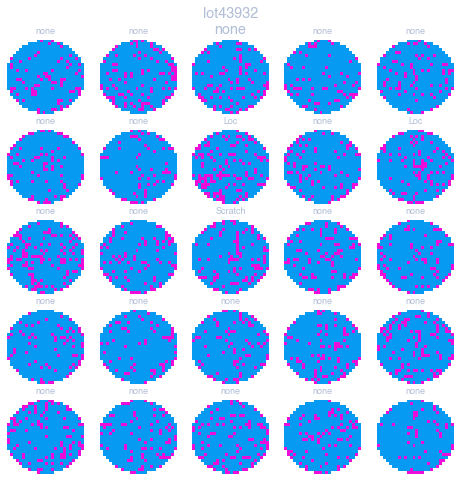

lot18377


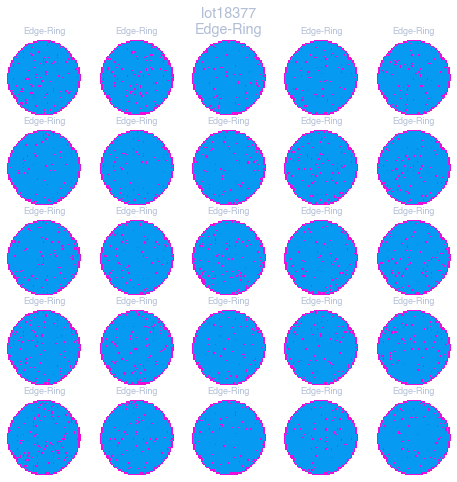

lot43246


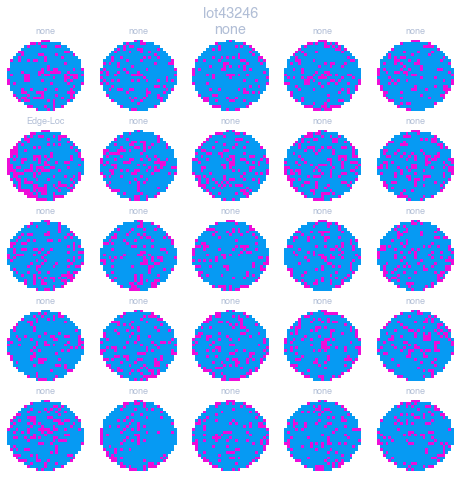

In [587]:
for lot in lots_used.values():
    print(lot)
    plot_lot(lot)
    plt.show()

[30x30]


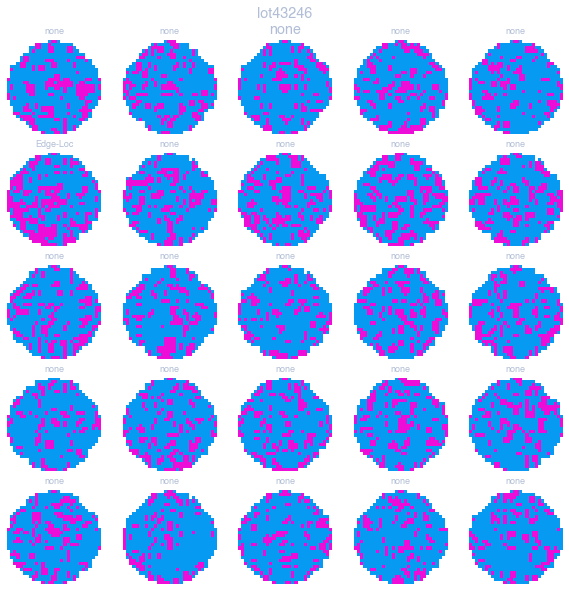

(25, 27)


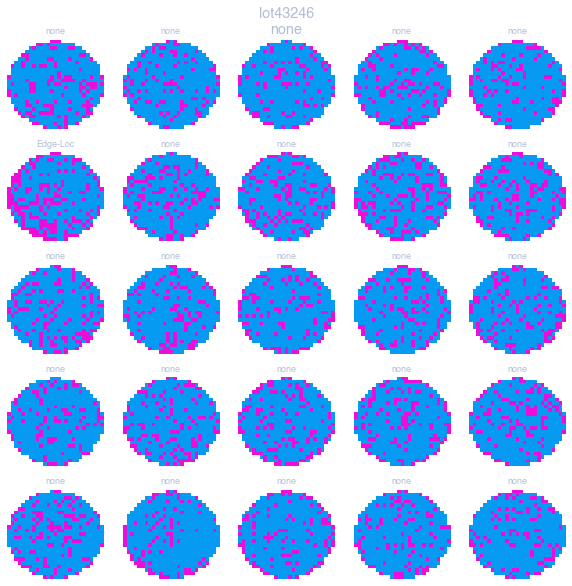

[60x60]


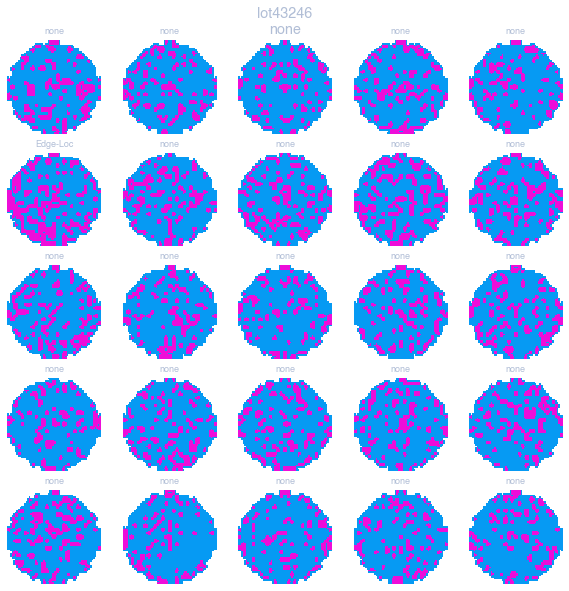

In [594]:
lot = 'lot43246'
print('[30x30]')
plot_lot(lot, resize=True, img_dims=[30,30], fig_size=[10,10])
print(f"{df1[df1.lotName == lot]['shape'].iloc[0]}")
plot_lot(lot, fig_size=[10,10])
print('[60x60]')
plot_lot(lot, resize=True, img_dims=[60,60], fig_size=[10,10])